#**TECHBALANCE:**Classifying Mental Health Status

The **TECHBALANCE** project aims to develop a machine learning model that classifies individuals' mental health status into four categories: Excellent, Good, Fair, and Poor. Using patterns of technology usage as input, this model will assess the potential impact of digital behavior on mental well-being, providing actionable insights to promote balanced technology use for improved mental health outcomes.

### Importing Needed packages

In [ ]:
# Install keras-tuner
!pip install -q keras-tuner

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import random

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Google Colab Integration
from google.colab import drive

# Data Preprocessing Libraries
from sklearn.preprocessing import (
    LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, label_binarize
)
from sklearn.compose import ColumnTransformer

# Model Selection and Evaluation
from sklearn.model_selection import (
    train_test_split, KFold, GridSearchCV, RandomizedSearchCV, cross_val_score
)
from sklearn.metrics import (
    accuracy_score, classification_report, f1_score, confusion_matrix,
    r2_score, roc_auc_score, roc_curve
)

# Machine Learning Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
)
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline, make_pipeline

# Ensemble Methods
from mlxtend.classifier import StackingClassifier

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras_tuner as kt  # Keras Tuner for hyperparameter tuning

# Utility Libraries
from collections import Counter  # For counting occurrences in data

# Install Keras Tuner
!pip install keras-tuner

#for performance matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
drive.mount('/content/drive')

ValueError: mount failed

### Downloading Data

In [ ]:
file_path = '/content/drive/My Drive/mental_health_and_technology_usage_2024.csv'
df_mentalhealth = pd.read_csv(file_path)

#**Data preprocessing**

## Understanding the Data

### `mental_health_and_technology_usage_2024.csv`:
DESCRIPTION ABOUT THE DATASET AND THE FEATURES[link text](https://)

## Reading the data in

In [ ]:
# take a look at the dataset
df_mentalhealth.head()

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


We noticed that we have an userID which is an extra att that we do not need it in our case, so we are going to remove it

In [ ]:
# Remove the 'User_ID' column
df_mentalhealth = df_mentalhealth.drop(columns=['User_ID'])

# Save the cleaned dataset
df_mentalhealth.to_csv('/content/drive/My Drive/mental_health_and_technology_usage_2024U.csv', index=False)

In [ ]:
#reading the new data
file_path = '/content/drive/My Drive/mental_health_and_technology_usage_2024U.csv'
df_mentalhealth = pd.read_csv(file_path)

In [ ]:
df_mentalhealth.head()

,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


### Data Exploration

Let's first Show our data satus if needing any cleaning steps or not




In [ ]:
df_mentalhealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       10000 non-null  int64  
 1   Gender                    10000 non-null  object 
 2   Technology_Usage_Hours    10000 non-null  float64
 3   Social_Media_Usage_Hours  10000 non-null  float64
 4   Gaming_Hours              10000 non-null  float64
 5   Screen_Time_Hours         10000 non-null  float64
 6   Mental_Health_Status      10000 non-null  object 
 7   Stress_Level              10000 non-null  object 
 8   Sleep_Hours               10000 non-null  float64
 9   Physical_Activity_Hours   10000 non-null  float64
 10  Support_Systems_Access    10000 non-null  object 
 11  Work_Environment_Impact   10000 non-null  object 
 12  Online_Support_Usage      10000 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 1015.8+ KB


Let's Second have a descriptive exploration on our data.


In [ ]:
# summarize the data
df_mentalhealth.describe()

,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.518600,6.474341,3.972321,2.515598,7.975765,6.500724,5.003860
std,13.920217,3.169022,2.313707,1.446748,4.042608,1.450933,2.905044
min,18.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000
25%,29.000000,3.760000,1.980000,1.260000,4.520000,5.260000,2.490000
50%,42.000000,6.425000,3.950000,2.520000,7.900000,6.500000,4.990000
75%,54.000000,9.212500,5.990000,3.790000,11.500000,7.760000,7.540000
max,65.000000,12.000000,8.000000,5.000000,15.000000,9.000000,10.000000


Let's select some features to explore more.


In [ ]:
cdf = df_mentalhealth[['Mental_Health_Status','Stress_Level','Work_Environment_Impact']]
cdf.head(9)

,Mental_Health_Status,Stress_Level,Work_Environment_Impact
0,Good,Low,Negative
1,Poor,High,Positive
2,Fair,High,Negative
3,Excellent,Medium,Negative
4,Good,Low,Positive
5,Poor,Low,Neutral
6,Excellent,Medium,Neutral
7,Excellent,Medium,Neutral
8,Fair,Medium,Positive


We can plot each of these features:


In [ ]:
df_mentalhealth=pd.DataFrame(df_mentalhealth)
df_mentalhealth.head()

,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


<Axes: xlabel='Stress_Level'>

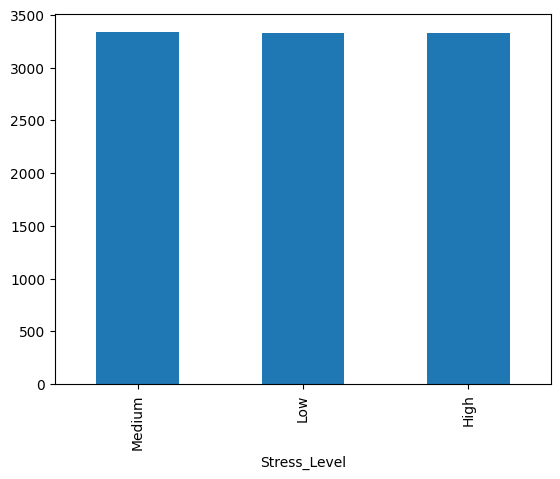

In [ ]:
df_mentalhealth.Stress_Level.value_counts().plot(kind = 'bar')

first our class or Dependence varible that we will predict

(array([2508.,    0.,    0., 2484.,    0.,    0., 2490.,    0.,    0.,
        2518.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

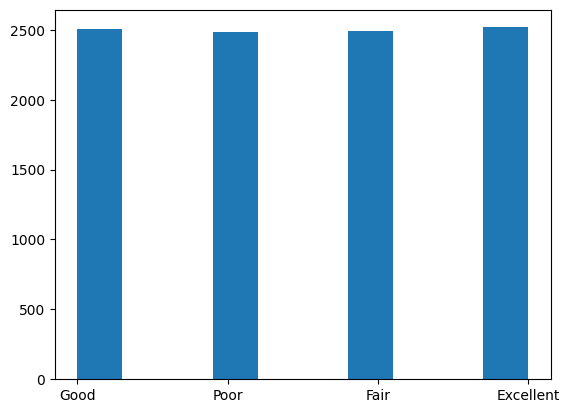

In [ ]:
plt.hist(df_mentalhealth['Mental_Health_Status'])

Then we will plot each feature

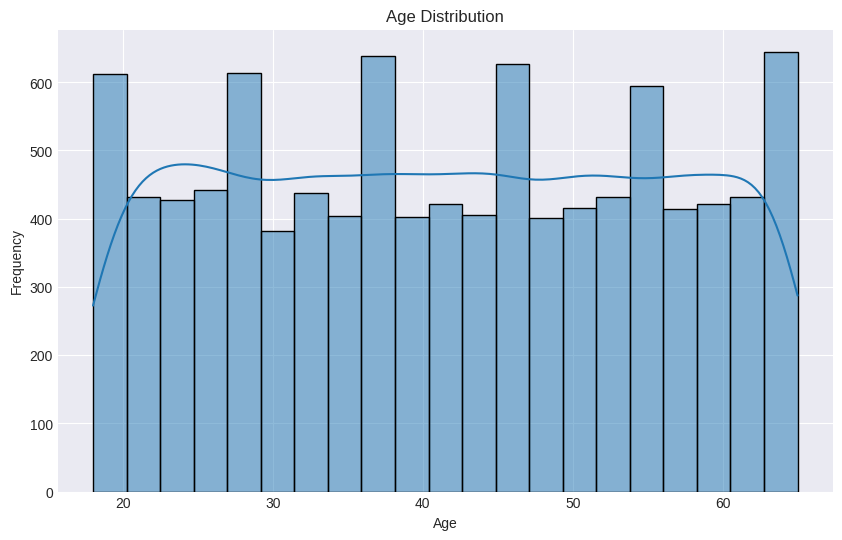

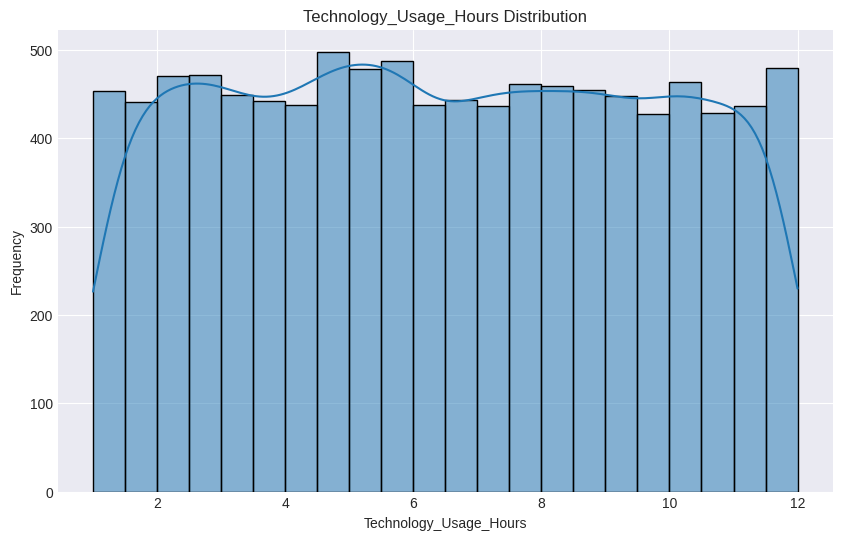

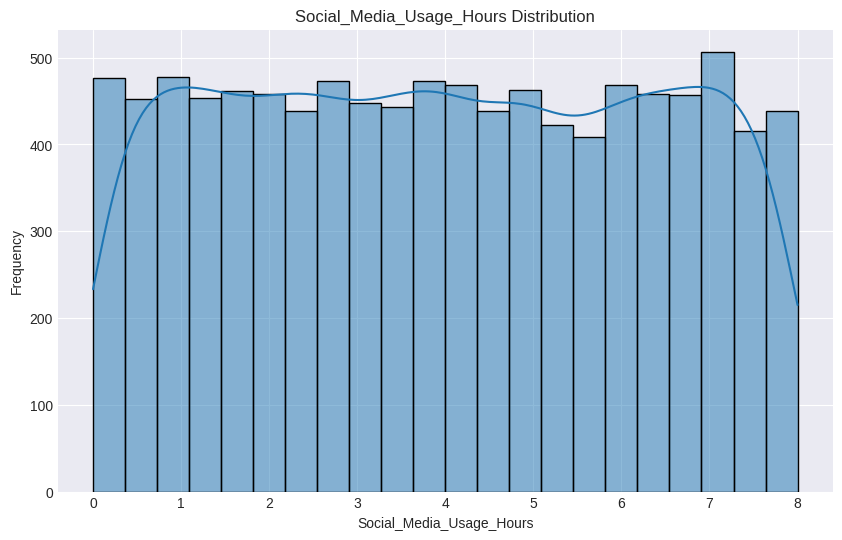

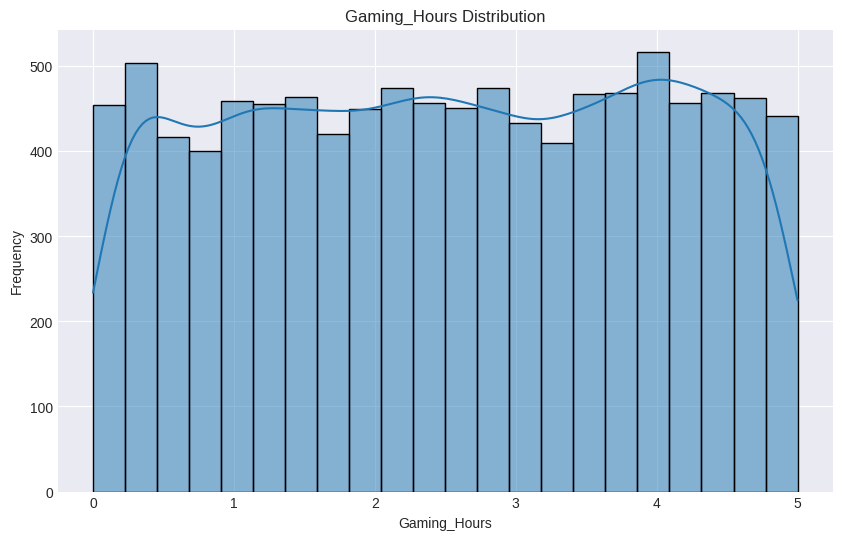

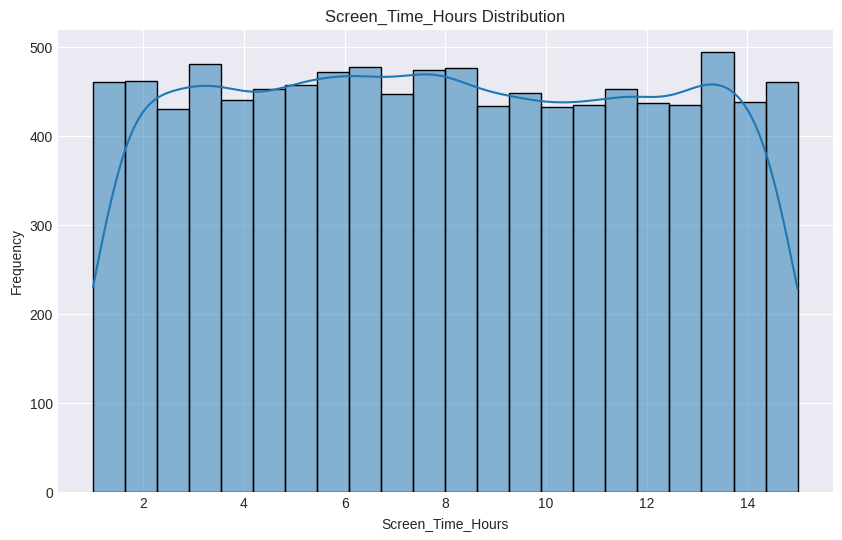

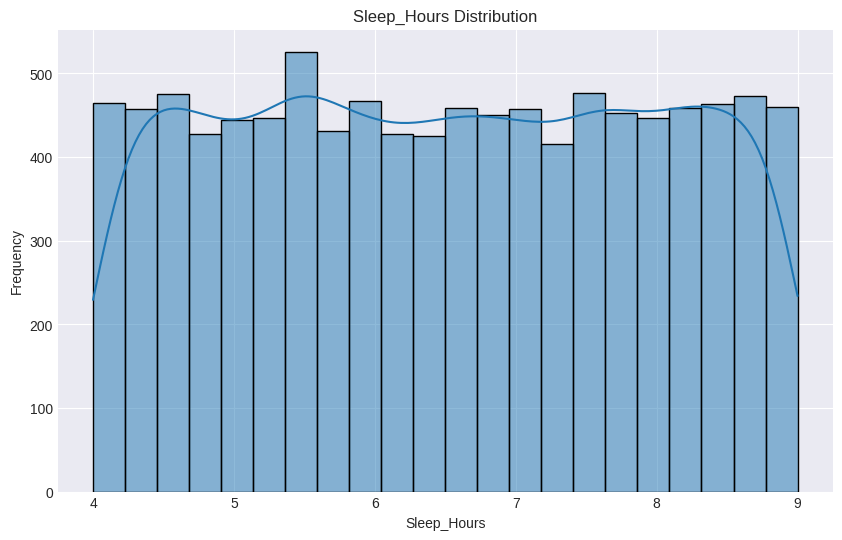

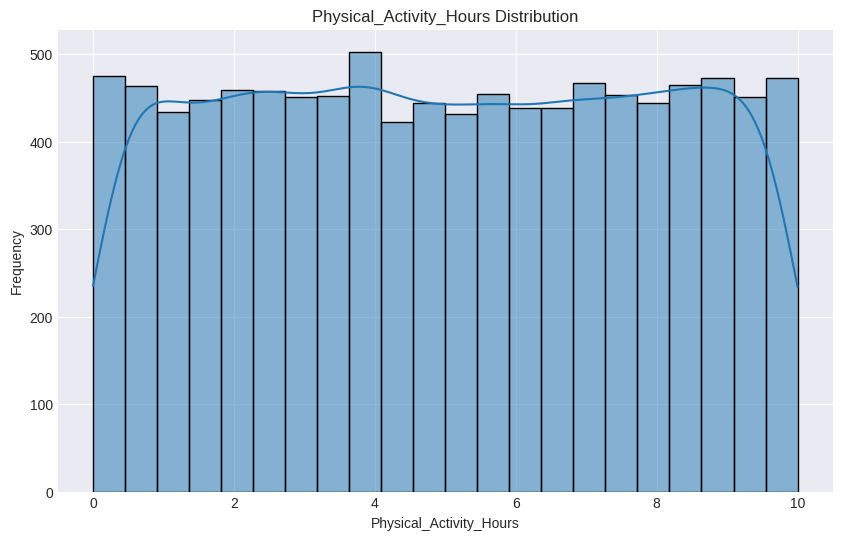

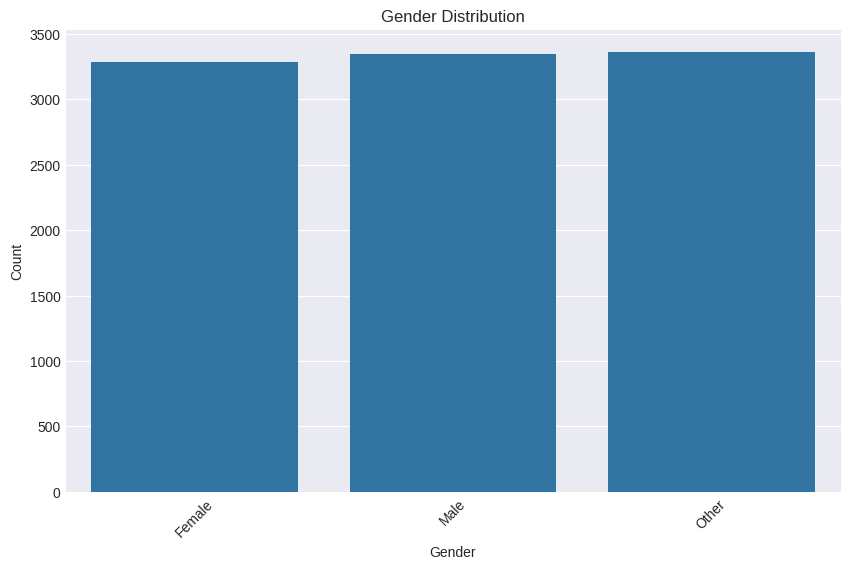

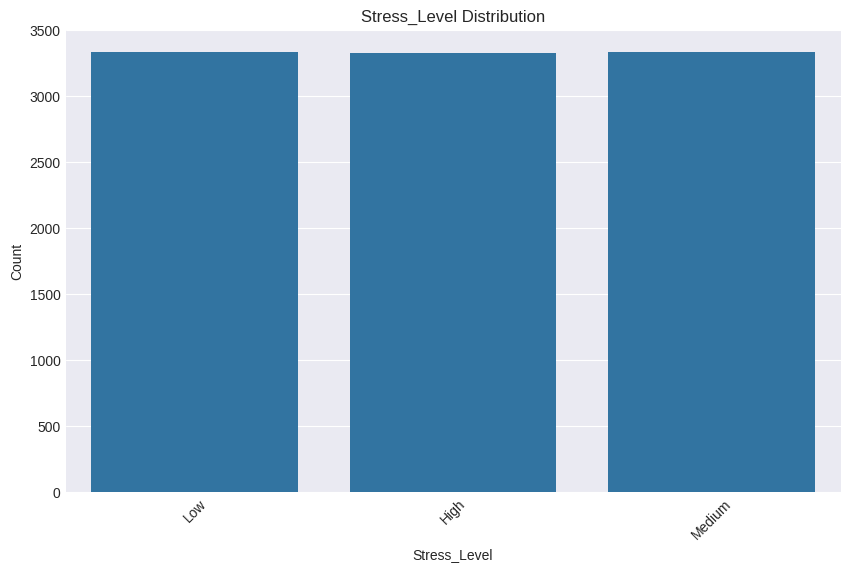

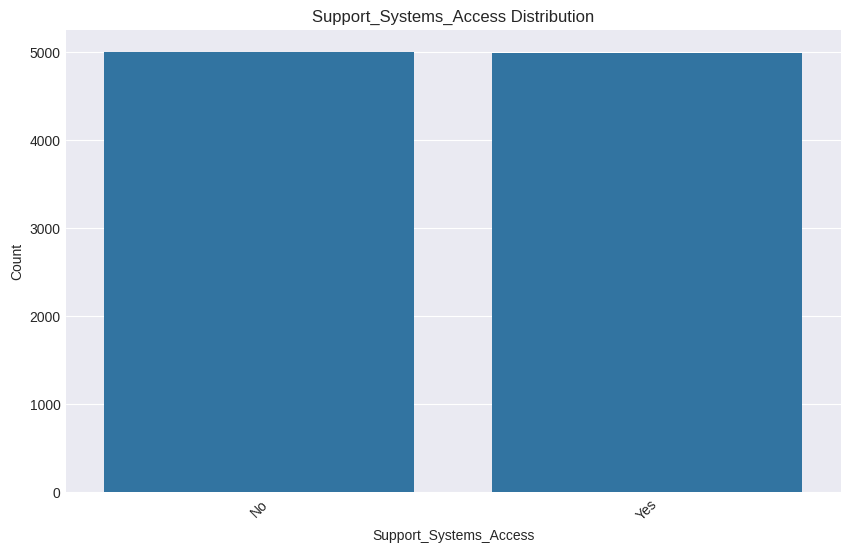

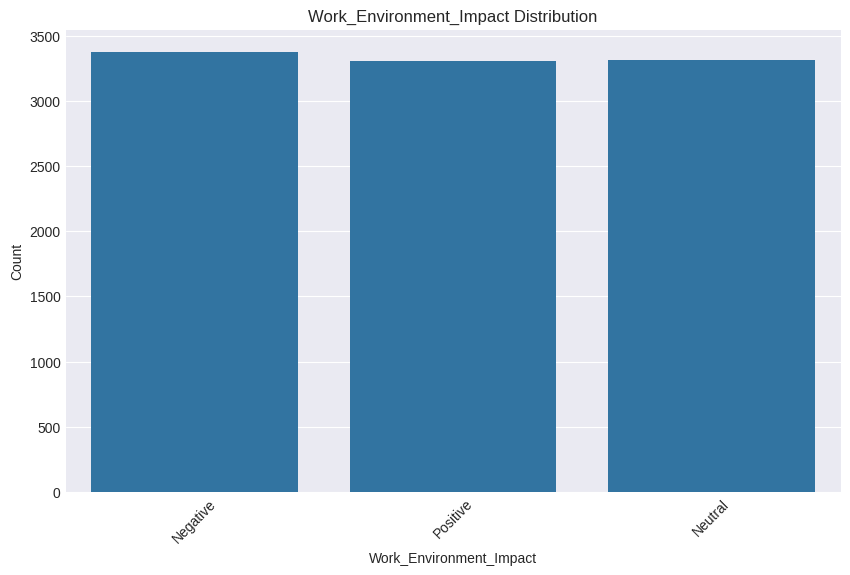

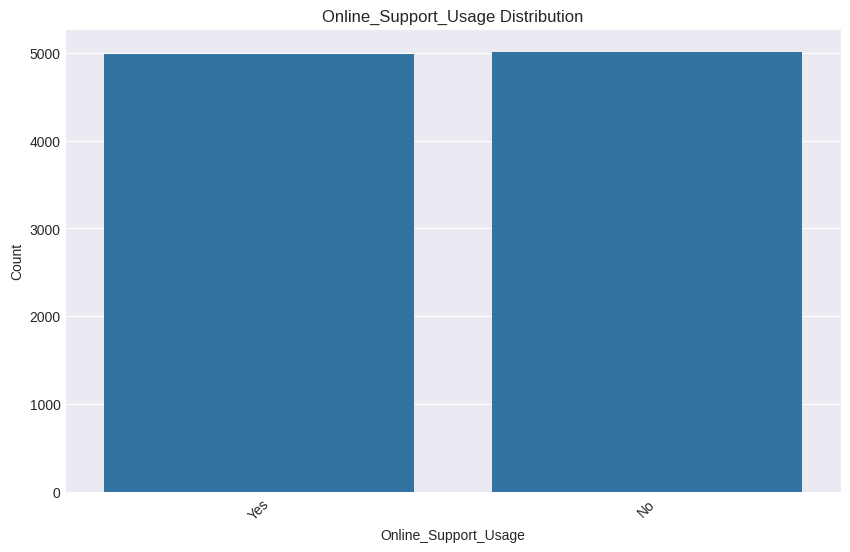

In [ ]:
# Use Matplotlib style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Function to plot numerical features
def plot_numerical_features(df_mentalhealth):
    numerical_features = [
        'Age', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours',
        'Gaming_Hours', 'Screen_Time_Hours', 'Sleep_Hours',
        'Physical_Activity_Hours'
    ]

    # Plot each numerical feature as a histogram
    for feature in numerical_features:
        plt.figure()
        sns.histplot(df_mentalhealth[feature], kde=True)
        plt.title(f'{feature} Distribution')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

# Function to plot categorical features
def plot_categorical_features(df_mentalhealth):
    categorical_features = [
        'Gender', 'Stress_Level',
        'Support_Systems_Access', 'Work_Environment_Impact',
        'Online_Support_Usage'
    ]

    # Plot each categorical feature as a count plot
    for feature in categorical_features:
        plt.figure()
        sns.countplot(data=df_mentalhealth, x=feature)
        plt.title(f'{feature} Distribution')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

# Plot numerical and categorical feature
plot_numerical_features(df_mentalhealth)
plot_categorical_features(df_mentalhealth)


In [ ]:

le=LabelEncoder()

#Encoding Categorical Variables
In order to represent categorical data numerically for use in our models, we will apply encoding techniques. For the Mental_Health_Status column and Stress_Level we will use an OrdinalEncoder to assign numeric values based on the severity of mental health states and Stress_Level.

For other binary categorical variables, we will apply binary encoding.

In [ ]:

# Ensure the Stress_Level column is in string format
df_mentalhealth['Stress_Level'] = df_mentalhealth['Stress_Level'].astype(str)

# Define the order of the categories for Stress_Level
categories = [['Low', 'Medium', 'High']]  # Defining the order from lowest to highest stress

# Initialize the OrdinalEncoder with the specific order
ordinal_encoder = OrdinalEncoder(categories=categories)

# Fit and transform the Stress_Level column
df_mentalhealth['Stress_Level'] = ordinal_encoder.fit_transform(df_mentalhealth[['Stress_Level']])

# Display the first few rows to verify the transformation
print(df_mentalhealth[['Stress_Level']].head())


   Stress_Level
0           0.0
1           2.0
2           2.0
3           1.0
4           0.0


In [ ]:

# Encoding 'Work_Environment_Impact' as ordinal: 0 (Negative), 1 (Neutral), 2 (Positive)
df_mentalhealth['Work_Environment_Impact'] = df_mentalhealth['Work_Environment_Impact'].map({'Negative': 0,'Neutral': 1,'Positive': 2})

# Encoding 'Support_Systems_Access' as 0 and 1
df_mentalhealth['Support_Systems_Access'] = df_mentalhealth['Support_Systems_Access'].map({'No': 0, 'Yes': 1})

# Encoding 'Online_Support_Usage' as 0 and 1
df_mentalhealth['Online_Support_Usage'] = df_mentalhealth['Online_Support_Usage'].map({'No': 0, 'Yes': 1})

# Display the first few rows to verify the transformation
print(df_mentalhealth[['Work_Environment_Impact', 'Support_Systems_Access', 'Online_Support_Usage']].head())


   Work_Environment_Impact  Support_Systems_Access  Online_Support_Usage
0                        0                       0                     1
1                        2                       1                     0
2                        0                       0                     0
3                        0                       1                     1
4                        2                       0                     1


In [ ]:
# Remove rows where 'gender' column contains 'Other'
df_mentalhealth = df_mentalhealth[df_mentalhealth['Gender'] != 'Other']

# Then Encoding 'Gender' as 0 and 1
df_mentalhealth['Gender'] = df_mentalhealth['Gender'].map({'Female': 0, 'Male': 1})

# Display the first few rows to verify the transformation
print(df_mentalhealth[['Gender']].head())
#save it to use it for the binary clasification
df_mentalhealth.to_csv('/content/drive/My Drive/new_dataset.csv', index=False)
#reading the new data for the binnary classification
file_path = '/content/drive/My Drive/new_dataset.csv'
df_binary = pd.read_csv(file_path)


<ipython-input-9-13c7e514aeb4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mentalhealth['Gender'] = df_mentalhealth['Gender'].map({'Female': 0, 'Male': 1})


   Gender
0       0
1       1
2       1
3       0
4       1


In [ ]:

# Ensure the Mental_Health_Status column is in string format
df_mentalhealth['Mental_Health_Status'] = df_mentalhealth['Mental_Health_Status'].astype(str)

# Define the order of the categories for Mental Health Status
categories = [['Poor', 'Fair', 'Good', 'Excellent']]  # Defining the order from lowest to highest

# Initialize the OrdinalEncoder with the specific order
ordinal_encoder = OrdinalEncoder(categories=categories)

# Fit and transform the Mental_Health_Status column
df_mentalhealth['Mental_Health_Status'] = ordinal_encoder.fit_transform(df_mentalhealth[['Mental_Health_Status']])

# Display the first few rows to verify the transformation
print(df_mentalhealth[['Mental_Health_Status']].head())


   Mental_Health_Status
0                   2.0
1                   0.0
2                   1.0
3                   3.0
4                   2.0


In [ ]:
#save the new data
df_mentalhealth.to_csv('/content/drive/My Drive/encoded_dataset.csv', index=False)
#reading the new data
file_path = '/content/drive/My Drive/encoded_dataset.csv'
df_mentalhealth = pd.read_csv(file_path)

<Axes: >

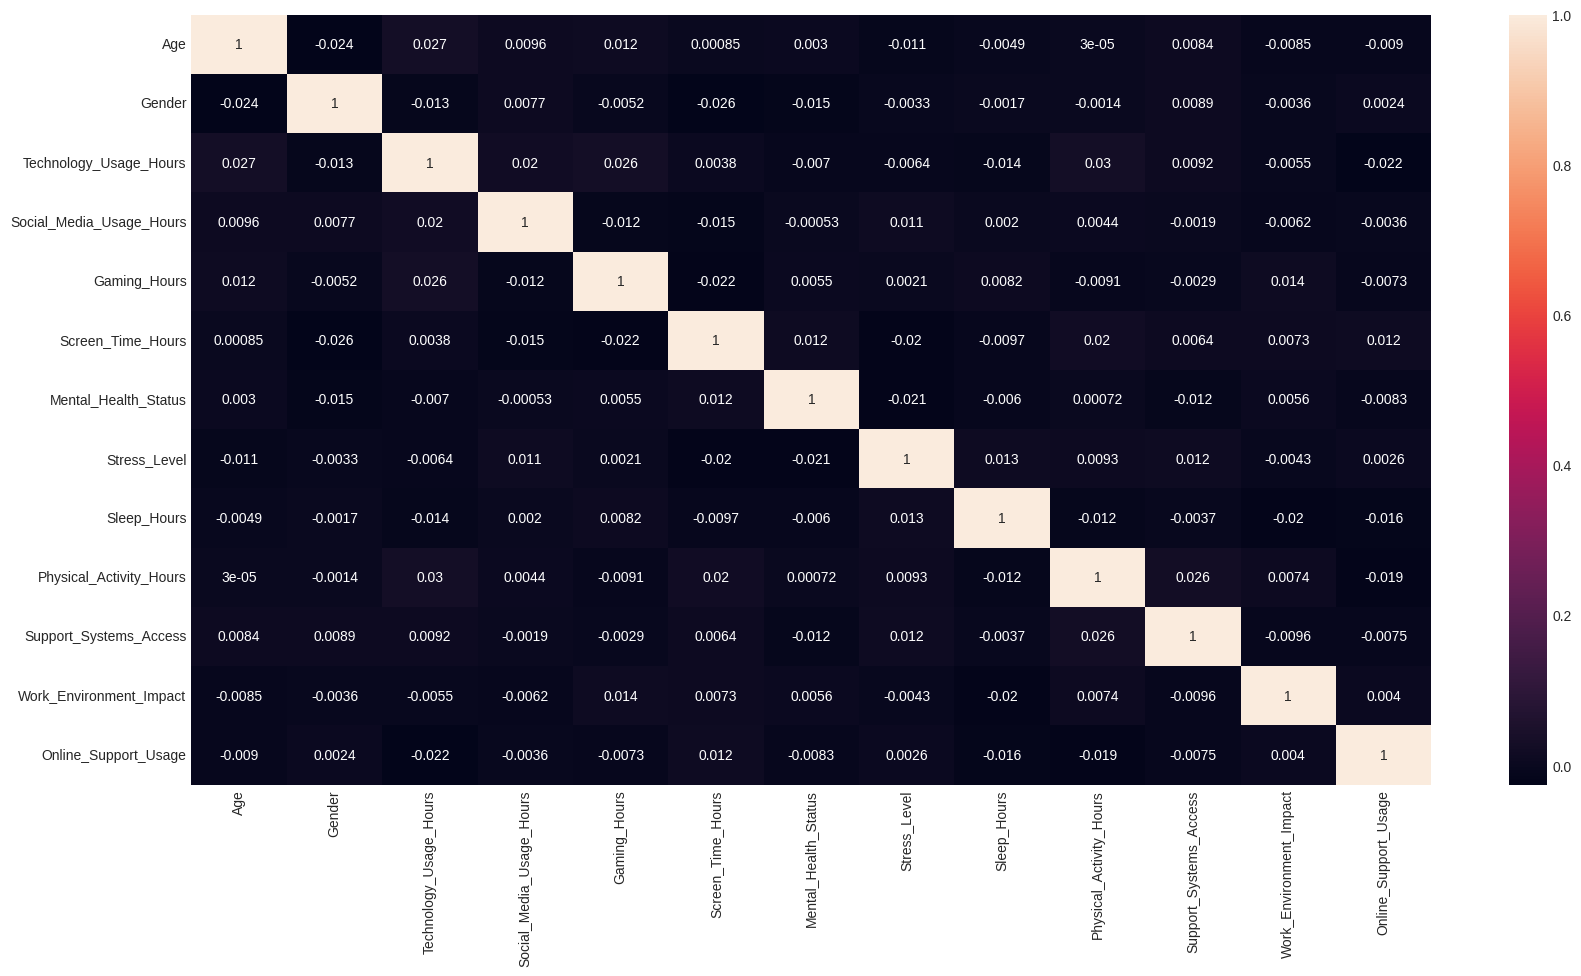

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_mentalhealth.corr(),annot=True)

As we see this figure  show us the relationship  betweent each tow features and what a type of relation either  postive or negative   we can see how the c dependence varible (Mental_Health_Status ) highly and positive  carolated with Screen_Time_Hours and

In [ ]:
df_mentalhealth.corr()

,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
Age,1.000000,-0.023578,0.026880,0.009629,0.012451,0.000848,0.002980,-0.010954,-0.004856,0.000030,0.008431,-0.008526,-0.008997
Gender,-0.023578,1.000000,-0.013234,0.007671,-0.005167,-0.025934,-0.014567,-0.003314,-0.001741,-0.001439,0.008855,-0.003621,0.002417
Technology_Usage_Hours,0.026880,-0.013234,1.000000,0.019723,0.026346,0.003768,-0.007011,-0.006425,-0.013612,0.029896,0.009211,-0.005485,-0.022174
Social_Media_Usage_Hours,0.009629,0.007671,0.019723,1.000000,-0.011532,-0.015460,-0.000526,0.011485,0.002038,0.004427,-0.001873,-0.006217,-0.003620
Gaming_Hours,0.012451,-0.005167,0.026346,-0.011532,1.000000,-0.021505,0.005512,0.002106,0.008183,-0.009106,-0.002857,0.013657,-0.007275
Screen_Time_Hours,0.000848,-0.025934,0.003768,-0.015460,-0.021505,1.000000,0.011710,-0.019814,-0.009749,0.020241,0.006393,0.007292,0.011633
Mental_Health_Status,0.002980,-0.014567,-0.007011,-0.000526,0.005512,0.011710,1.000000,-0.021172,-0.005979,0.000717,-0.011588,0.005621,-0.008316
Stress_Level,-0.010954,-0.003314,-0.006425,0.011485,0.002106,-0.019814,-0.021172,1.000000,0.013136,0.009346,0.011792,-0.004280,0.002580
Sleep_Hours,-0.004856,-0.001741,-0.013612,0.002038,0.008183,-0.009749,-0.005979,0.013136,1.000000,-0.011804,-0.003651,-0.020458,-0.015554
Physical_Activity_Hours,0.000030,-0.001439,0.029896,0.004427,-0.009106,0.020241,0.000717,0.009346,-0.011804,1.000000,0.025761,0.007351,-0.018993


 To explore potential relationships between key lifestyle factors and mental health outcomes ,we will generate scatter plots comparing some input features with the target variable, Mental Health Status.

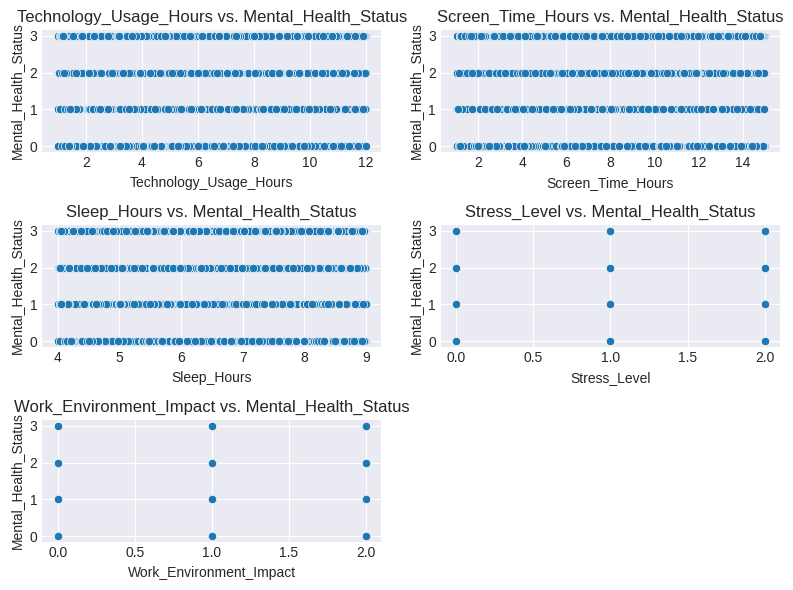

In [ ]:
target_variable = 'Mental_Health_Status'
input_features = ['Technology_Usage_Hours', 'Screen_Time_Hours', 'Sleep_Hours' , 'Stress_Level' ,   'Work_Environment_Impact']

# Create scatter plots of input features vs. the target variable
# Adjusted figure size for better visualization
plt.figure(figsize=(8, 6))

# Changed subplot layout to accommodate 5 plots (e.g., 3 rows, 2 columns)
for i, feature in enumerate(input_features):
    plt.subplot(3, 2, i + 1)  # Adjusted subplot grid
    sns.scatterplot(x=df_mentalhealth[feature], y=df_mentalhealth[target_variable])
    plt.title(f'{feature} vs. {target_variable}')

plt.tight_layout()
plt.show()

## Feature selection
###Our Plan:
We are going to calculate the R² value for the dataset with and without demographic features to assess whether these features contribute significantly to the model's predictive power.


In [ ]:
# Define features with and without demographics (Age, Gender)
X_with_demographics = df_mentalhealth[["Age", "Gender", "Technology_Usage_Hours",
                                       "Social_Media_Usage_Hours", "Gaming_Hours",
                                       "Screen_Time_Hours", "Sleep_Hours",
                                       "Physical_Activity_Hours"]]

# Encode 'Gender' for R² calculation (categorical feature)
#X_with_demographics = pd.get_dummies(X_with_demographics, drop_first=True)

# Features without demographics (excluding Age, Gender)
X_without_demographics = df_mentalhealth[["Technology_Usage_Hours",
                                          "Social_Media_Usage_Hours", "Gaming_Hours",
                                          "Screen_Time_Hours", "Sleep_Hours",
                                          "Physical_Activity_Hours"]]

# Define target variable (Mental_Health_Status)
y = df_mentalhealth['Mental_Health_Status']

# Initialize Linear Regression
lr = LinearRegression()

# R² with demographics
lr.fit(X_with_demographics, y)
r2_with_demographics = r2_score(y, lr.predict(X_with_demographics))

# R² without demographics
lr.fit(X_without_demographics, y)
r2_without_demographics = r2_score(y, lr.predict(X_without_demographics))

r2_with_demographics, r2_without_demographics


(0.00047214023304176234, 0.00025896257276858403)

##Feature Selection Summary

After evaluating the impact of demographic features (Age and Gender) on our model using R², we observed a slight improvement in predictive power when these features were included. Specifically, the R² increased from 0.00025 without demographics to 0.00047 with demographics. While the improvement is minimal, it indicates that demographic features still contribute to explaining some variance in the target variable.

##Splitting the dataset into training and testing

In [ ]:
# Separate features and target variable
y = df_mentalhealth['Mental_Health_Status']
X = df_mentalhealth.drop(columns=['Mental_Health_Status'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5308, 12), (1328, 12), (5308,), (1328,))

Check if Dataset balance

In [ ]:
# Assuming y_train is target labels (could be a list or numpy array)
class_counts = Counter(y_train)
print(class_counts)

Counter({3.0: 1342, 0.0: 1330, 2.0: 1328, 1.0: 1308})


#**Model training, evaluation,visualization**

##SVM
###Use the RandomizedSearchCV for finding the best kernels and parameters.

1- linear kernel

In [ ]:
# Linear Kernel
print("Evaluating SVM with Linear Kernel...")
svc_linear = SVC(kernel='linear')

# Define parameter grid
param_dist_linear = {
    'C': [1, 5, 10]
}

# Perform Randomized Search with Cross-Validation
random_search_linear = RandomizedSearchCV(svc_linear, param_dist_linear, n_iter=3, cv=5, scoring='f1_macro', verbose=2, random_state=42)
random_search_linear.fit(X_train, y_train)

# Store results
print("Best Parameters for Linear Kernel:", random_search_linear.best_params_)
print("Best F1 Score for Linear Kernel:", random_search_linear.best_score_)


Evaluating SVM with Linear Kernel...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ................................................C=1; total time=  18.5s
[CV] END ................................................C=1; total time=  13.4s
[CV] END ................................................C=1; total time=   6.6s
[CV] END ................................................C=1; total time=  11.2s
[CV] END ................................................C=1; total time=   8.3s
[CV] END ................................................C=5; total time=  21.1s
[CV] END ................................................C=5; total time=  19.9s
[CV] END ................................................C=5; total time=  22.2s
[CV] END ................................................C=5; total time=  28.6s
[CV] END ................................................C=5; total time=  20.5s
[CV] END ...............................................C=10; total time=  42.2s
[CV] END ...

2. RBF Kernel

In [ ]:
# RBF Kernel
print("\nEvaluating SVM with RBF Kernel...")
svc_rbf = SVC(kernel='rbf')

# Define parameter grid
param_dist_rbf = {
    'C': [1, 5, 10],
    'gamma': [0.0005, 0.001, 0.005]
}

# Perform Randomized Search with Cross-Validation
random_search_rbf = RandomizedSearchCV(svc_rbf, param_dist_rbf, n_iter=5, cv=5, scoring='f1_macro', verbose=2, random_state=42)
random_search_rbf.fit(X_train, y_train)

# Store results
print("Best Parameters for RBF Kernel:", random_search_rbf.best_params_)
print("Best F1 Score for RBF Kernel:", random_search_rbf.best_score_)



Evaluating SVM with RBF Kernel...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..................................C=10, gamma=0.001; total time=   2.6s
[CV] END ..................................C=10, gamma=0.001; total time=   2.8s
[CV] END ..................................C=10, gamma=0.001; total time=   1.8s
[CV] END ..................................C=10, gamma=0.001; total time=   1.6s
[CV] END ..................................C=10, gamma=0.001; total time=   1.6s
[CV] END ...................................C=1, gamma=0.001; total time=   1.6s
[CV] END ...................................C=1, gamma=0.001; total time=   1.7s
[CV] END ...................................C=1, gamma=0.001; total time=   1.6s
[CV] END ...................................C=1, gamma=0.001; total time=   2.2s
[CV] END ...................................C=1, gamma=0.001; total time=   2.8s
[CV] END ...................................C=5, gamma=0.005; total time=   2.0s
[CV] END .....



```
# This is formatted as code
```

3. Polynomial Kernel

In [ ]:
# Polynomial Kernel
print("\nEvaluating SVM with Polynomial Kernel...")
svc_poly = SVC(kernel='poly')

# Define parameter grid
param_dist_poly = {
    'C': [1, 5, 10],
    'gamma': [0.0005, 0.001, 0.005],
    'degree': [2, 3]
}

# Perform Randomized Search with Cross-Validation
random_search_poly = RandomizedSearchCV(svc_poly, param_dist_poly, n_iter=5, cv=5, scoring='f1_macro', verbose=2, random_state=42)
random_search_poly.fit(X_train, y_train)

# Store results
print("Best Parameters for Polynomial Kernel:", random_search_poly.best_params_)
print("Best F1 Score for Polynomial Kernel:", random_search_poly.best_score_)



Evaluating SVM with Polynomial Kernel...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ........................C=1, degree=2, gamma=0.0005; total time=   2.2s
[CV] END ........................C=1, degree=2, gamma=0.0005; total time=   2.2s
[CV] END ........................C=1, degree=2, gamma=0.0005; total time=   1.5s
[CV] END ........................C=1, degree=2, gamma=0.0005; total time=   1.3s
[CV] END ........................C=1, degree=2, gamma=0.0005; total time=   1.3s
[CV] END .........................C=1, degree=2, gamma=0.001; total time=   1.4s
[CV] END .........................C=1, degree=2, gamma=0.001; total time=   2.2s
[CV] END .........................C=1, degree=2, gamma=0.001; total time=   2.2s
[CV] END .........................C=1, degree=2, gamma=0.001; total time=   1.5s
[CV] END .........................C=1, degree=2, gamma=0.001; total time=   1.3s
[CV] END .........................C=5, degree=2, gamma=0.005; total time=   4.7s
[CV] EN

4. Sigmoid Kernel

In [ ]:
# Sigmoid Kernel
print("\nEvaluating SVM with Sigmoid Kernel...")
svc_sigmoid = SVC(kernel='sigmoid')

# Define parameter grid
param_dist_sigmoid = {
    'C': [1, 5, 10],
    'gamma': [0.0005, 0.001, 0.005]
}

# Perform Randomized Search with Cross-Validation
random_search_sigmoid = RandomizedSearchCV(svc_sigmoid, param_dist_sigmoid, n_iter=5, cv=5, scoring='f1_macro', verbose=2, random_state=42)
random_search_sigmoid.fit(X_train, y_train)

# Store results
print("Best Parameters for Sigmoid Kernel:", random_search_sigmoid.best_params_)
print("Best F1 Score for Sigmoid Kernel:", random_search_sigmoid.best_score_)



Evaluating SVM with Sigmoid Kernel...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..................................C=10, gamma=0.001; total time=   1.3s
[CV] END ..................................C=10, gamma=0.001; total time=   1.7s
[CV] END ..................................C=10, gamma=0.001; total time=   2.0s
[CV] END ..................................C=10, gamma=0.001; total time=   2.0s
[CV] END ..................................C=10, gamma=0.001; total time=   1.3s


### Use the best parameters for predicitons and evaluate the performance.

In [ ]:
# RBF Kernel SVM Model
print("Evaluating SVM with RBF Kernel...")

# Best parameters obtained from RandomizedSearchCV
best_params = {
    'C': 1,
    'gamma': 0.0005
}

# Create the final SVM model using the RBF kernel and best hyperparameters
final_svc = SVC(kernel='rbf', **best_params)

# Fit the model on the training data
final_svc.fit(X_train, y_train)

# Evaluate on the test set
y_pred = final_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy of the best model: {accuracy:.4f}")
print(f"F1 Macro of the best model: {f1_macro:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, title='Confusion Matrix for RBF SVM Model')

# Print classification report
print(classification_report(y_test, y_pred))


##Summery of Results
###Given these results, it's evident that the model is suffering from underfitting, as it fails to capture the underlying patterns in the data effectively. To address this issue, we will build a baseline model using Logistic Regression, which may provide improved performance due to its linear characteristics. This step is essential to enhance the model's predictive capabilities and better meet the project's objectives.

# Logstic regression


Logistic Regression is a classification algorithm often used to model binary or multi-class classification tasks. Despite its name, it is not a regression algorithm in the traditional sense. Instead, it predicts the probability that a given input belongs to a particular class.

In [ ]:
# Define parameter grid for Logistic Regression
param_grid_logreg = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1,5]
}


# Define Logistic Regression model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)

model_logreg = make_pipeline(logreg)

# Grid search with cross-validation for Logistic Regression
grid_logreg = GridSearchCV(model_logreg, param_grid_logreg, cv=5, verbose=2)
grid_logreg.fit(X_train, y_train)
best_logreg_params = grid_logreg.best_params_

# Cross-validation score with best parameters
logreg_cv_score = cross_val_score(grid_logreg.best_estimator_, X_train, y_train, cv=5).mean()

# Print best parameters and cross-validation score
print("Best Logistic Regression Parameters:", best_logreg_params)
print("Logistic Regression Cross-Validation Score:", logreg_cv_score)

# Evaluate on the test set using the best model
best_model = grid_logreg.best_estimator_
y_pred = best_model.predict(X_test)

# Test set performance metrics
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", test_accuracy)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))
# Function to plot the confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, title='Confusion Matrix for Best Logistic Model')

After spliting Dataset To trining and Testing:


*   
1-Hyperprametert Tuning
Using Grid Search method
by provding the logstic regression more than 1 value for C prameter  [0.001, 0.01, 0.1, 1, 5]
so sinec our data suffered from underfitting the hig C value not appropriate after hypertuning the best C value was 0.1.
*  
2-cross validation
in these step we using a K-fold cross valdtion specifically 5-fold
for training and validation  the dataset.






*   3-testing model

After selecting the best hyperparameters and testing the model on an unseen dataset, the results show that the model's overall performance is poor, with an accuracy of only 25%, meaning it correctly predicted only 25% of the samples. Other evaluation metrics, such as precision, recall, and F1-score, were also low. These results suggest that the model is underfitting the data. Additionally, the dataset appears to have complex relationships and involves a multi-class classification task, further indicating that a more sophisticated model may be needed to capture these patterns effectively.




# **Ensemble Learning**

#####To enhance the predictive accuracy and robustness of our mental health model, we will employ ensemble method, which combines multiple base models to create a stronger, more reliable predictor by leveraging the unique strengths of each model.

we will utilize a BaggingClassifie to enhance model performance by combining the predictive power of multiple algorithms.
.The BaggingClassifier with Decision Trees reduces variance by training multiple models on random data subsets. The StackingClassifier combines predictions from base models (Decision Tree, Random Forest and Gradient Boosting) using a meta-classifier (Logistic Regression) for better accuracy.

In [ ]:
# --- Base Models ---

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Logistic Regression Classifier as the meta-model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)

# --- Fit base models on training data ---
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# --- Make predictions with base models ---
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

# --- Evaluate the base models ---
print("Decision Tree Accuracy: {:.2f}".format(accuracy_score(y_test, dt_pred)))
print("Random Forest Accuracy: {:.2f}".format(accuracy_score(y_test, rf_pred)))
print("Gradient Boosting Accuracy: {:.2f}".format(accuracy_score(y_test, gb_pred)))

# --- Bagging Classifier ---
# Create a BaggingClassifier using Decision Tree as base model
bagging_model = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)

# Fit the bagging model on the training data
bagging_model.fit(X_train, y_train)

# Make predictions using the bagging model
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the Bagging Classifier
print("Bagging Classifier Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_bagging)))

# --- Stacking Classifier ---
# Use the existing logistic regression model as the meta-model
stacking_clf = StackingClassifier(classifiers=[dt, rf, gb], meta_classifier=logreg)

# Fit the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Make predictions using the Stacking Classifier
stacked_pred = stacking_clf.predict(X_test)

# Evaluate the Stacking Classifier
print("Stacking Classifier Accuracy: {:.2f}".format(accuracy_score(y_test, stacked_pred)))
(y_test, stacked_pred)


We observe that the accuracy of all individual models, including Decision Tree, Random Forest and Gradient Boosting, is relatively low at 0.25. The Bagging Classifier shows a slight improvement with an accuracy of 0.27, while the Stacking Classifier performs slightly worse at 0.24.

Let's try Support Vector Machine (SVM) using an RBF kernel as the meta-model in a stacking classifier instead of Logistic

In [ ]:
# --- Base Models ---

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# SVM Classifier as the meta-model with RBF kernel
final_svc = SVC(kernel='rbf', probability=True)  # Set probability=True if needed

# --- Fit base models on training data ---
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# --- Make predictions with base models ---
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

# --- Evaluate the base models ---
print("Decision Tree Accuracy: {:.2f}".format(accuracy_score(y_test, dt_pred)))
print("Random Forest Accuracy: {:.2f}".format(accuracy_score(y_test, rf_pred)))
print("Gradient Boosting Accuracy: {:.2f}".format(accuracy_score(y_test, gb_pred)))

# --- Bagging Classifier ---
# Create a BaggingClassifier using Decision Tree as base model
bagging_model = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)

# Fit the bagging model on the training data
bagging_model.fit(X_train, y_train)

# Make predictions using the bagging model
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the Bagging Classifier
print("Bagging Classifier Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_bagging)))

# --- Stacking Classifier ---
# Create StackingClassifier using base models and the SVM meta model
stacking_clf = StackingClassifier(classifiers=[dt, rf, gb], meta_classifier=final_svc)

# Fit the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Make predictions using the Stacking Classifier
stacked_pred = stacking_clf.predict(X_test)

# Evaluate the Stacking Classifier
print("Stacking Classifier Accuracy: {:.2f}".format(accuracy_score(y_test, stacked_pred)))



the ensemble approach did not significantly enhance overall performance with 0.27 accuracy, indicating a need for further model tuning or exploration of alternative combinations.

 we implement a Voting Classifier that combines the predictions from the Logistic Regression and SVM models using a soft voting strategy. This approach aims to leverage the strengths of both classifiers to improve overall accuracy.

In [ ]:
# Re-initialize final_svc with probability=True
final_svc = SVC(C=1, degree=4, gamma=0.005, probability=True, kernel='rbf')  # Set kernel here

# Create a VotingClassifier with the provided models
voting_clf = VotingClassifier(estimators=[('logreg', logreg), ('svc', final_svc                    )], voting='soft')

# Fit the VotingClassifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the Voting Classifier
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Classification Report for Voting Classifier:")
print(classification_report(y_test, y_pred_voting))


The results show that the Voting Classifier achieved an accuracy of approximately 0.27, with no significant improvement compared to the individual models.

# Neural Network


In [ ]:
# Convert y_train and y_test to NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Ensure y_train and y_test have the correct data type (integer) for sparse_categorical_crossentropy
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Preprocessing pipeline (Assumes X_train, X_test, y_train, y_test are already defined)
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


# Hyperparameter Tuning Function & Cross validation with 5 folds

In [ ]:
# Define search space for random sampling
batch_sizes = [16, 32, 64, 128, 256]
epoch_range = range(10, 201)  # Epochs from 10 to 200
num_trials = 5  # Number of random trials
results = []

# Function to build and compile the model
def build_model(hp):
    model = tf.keras.models.Sequential()
    model.add(layers.Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32),
                           activation='relu', input_shape=(X_train_preprocessed.shape[1],)))
    model.add(layers.Dropout(rate=0.3))
    model.add(layers.Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(units=hp.Int('units_3', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(units=4, activation='softmax'))  # For multi-class classification

    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Perform K-Fold cross-validation
kf = KFold(n_splits=5)
fold_no = 1

for train_index, val_index in kf.split(X_train_preprocessed):
    print(f"Running Fold {fold_no}")

    X_train_fold, X_val_fold = X_train_preprocessed[train_index], X_train_preprocessed[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Perform random search on batch size and epochs
    for _ in range(num_trials):
        batch_size = random.choice(batch_sizes)
        epochs = random.choice(epoch_range)

        # Initialize tuner with random search
        tuner = kt.RandomSearch(
            build_model,
            objective='val_accuracy',
            max_trials=1,  # Single trial per random configuration
            executions_per_trial=1,
            directory='my_dir',
            project_name=f'tune_model_fold_{fold_no}'
        )

        # Perform hyperparameter search
        tuner.search(
            X_train_fold,
            y_train_fold,
            validation_data=(X_val_fold, y_val_fold),
            epochs=epochs,
            batch_size=batch_size,
            verbose=0
        )

        # Get the best model's validation accuracy
        best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
        best_model = tuner.hypermodel.build(best_hp)
        history = best_model.fit(
            X_train_fold,
            y_train_fold,
            validation_data=(X_val_fold, y_val_fold),
            epochs=epochs,
            batch_size=batch_size,
            verbose=0
        )
        val_acc = max(history.history['val_accuracy'])

        # Store results
        results.append({
            'fold': fold_no,
            'batch_size': batch_size,
            'epochs': epochs,
            'val_accuracy': val_acc,
            'best_units_1': best_hp.get('units_1'),
            'best_units_2': best_hp.get('units_2'),
            'best_units_3': best_hp.get('units_3'),
            'learning_rate': best_hp.get('learning_rate'),
        })

    fold_no += 1

# Find the best configuration overall
best_result = max(results, key=lambda x: x['val_accuracy'])
print(f"Best configuration overall: Fold {best_result['fold']}, "
      f"Batch Size {best_result['batch_size']}, Epochs {best_result['epochs']}, "
      f"Val Accuracy {best_result['val_accuracy']:.2f}")
print(f"Best hyperparameters: units_1={best_result['best_units_1']}, "
      f"units_2={best_result['best_units_2']}, units_3={best_result['best_units_3']}, "
      f"learning_rate={best_result['learning_rate']}")


Running Fold 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Reloading Tuner from my_dir/tune_model_fold_1/tuner0.json
Reloading Tuner from my_dir/tune_model_fold_1/tuner0.json


# Plot Training and Validation Accuracy

In [ ]:
# Plotting function for training metrics
def plot_curve(history):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.show()

# Plot training history
plot_curve(history)


based on the plot that represents the accuracy of Train and Validation on epoches increasing  that indicates underfitting as the validation is under the training set.

In [ ]:
# Define the preprocessing pipeline
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ]
)

# Apply preprocessing to both training and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
X_train_preprocessed = X_train_preprocessed.toarray() if hasattr(X_train_preprocessed, 'toarray') else X_train_preprocessed
X_test_preprocessed = X_test_preprocessed.toarray() if hasattr(X_test_preprocessed, 'toarray') else X_test_preprocessed

# Plotting function for metrics
def plot_curve(epochs, hist, list_of_metrics):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)
    plt.legend()
    plt.show()

# Define the model architecture
def create_model(my_learning_rate):
    model = tf.keras.models.Sequential()
    model.add(layers.Dense(units=64, activation='relu', input_shape=(X_train_preprocessed.shape[1],))) # First hidden layer
    model.add(layers.Dropout(rate=0.3))
    model.add(layers.Dense(units=128, activation='relu'))  # Second hidden layer
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(units=64, activation='relu'))  # Third hidden layer
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(units=4, activation='softmax'))  # Output layer for 4 classes
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])
    return model

# Training function
def train_model(model, train_features, train_label, epochs, batch_size=None, validation_split=0.1):
    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                        epochs=epochs, shuffle=True,
                        validation_split=validation_split)
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    return epochs, hist

# Hyperparameters based on tuning
learning_rate = 0.0001
epochs = 175
batch_size = 16
validation_split = 0.2

# Build and train the model
my_model = create_model(learning_rate)
epochs, hist = train_model(my_model, X_train_preprocessed, y_train, epochs, batch_size, validation_split)

# Plot the training metrics
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate on the test set
print("\nEvaluate the model on the test set:")
my_model.evaluate(x=X_test_preprocessed, y=y_test, batch_size=batch_size)


In [ ]:
# Predict the classes for the test set
y_pred = my_model.predict(X_test_preprocessed)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Calculate and display the classification report, which includes F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, digits=4))

# Calculate the overall F1-score (macro-average, weighted, etc., based on your preference)
f1 = f1_score(y_test, y_pred_classes, average='weighted')  # Use 'macro' or 'micro' if needed
print(f"Overall F1-score (weighted): {f1:.4f}")

In [ ]:
# Predict the classes for the test set
y_pred = my_model.predict(X_test_preprocessed)
y_pred_classes = y_pred.argmax(axis=1)

# Ensure y_test is an integer array with discrete labels
y_test = y_test.astype(int)

# Print unique values for verification
print("y_test unique values:", np.unique(y_test))
print("y_pred_classes unique values:", np.unique(y_pred_classes))

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, digits=4))

# Calculate the overall F1-score (weighted)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f"Overall F1-score (weighted): {f1:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, title='Confusion Matrix for NN Model')


# **Neural Network Summary**

The model achieved low accuracy scores (around 26% and lower), indicating that it is struggling to classify the data effectively. This is typically indicative of an overfitting problem.

To address this issue, we experimented with manipulating several hyperparameters, including:

Learning Rate: Adjusted to optimize the rate at which the model learns from the data.

Epochs: Increased to provide the model with more opportunities to learn from the training data.

Batch Size: Modified to influence how the model processes training data and updates its weights.

Validation Split: Changed to ensure a balanced allocation of training and validation data for more reliable performance assessment.
Despite these adjustments, the model's performance did not improve significantly,

#Learning curve

In the learning curve we are going to show  the different accuracy across diffrent models we trained and test and how well a each model performs.

The learning curve provides insights into how well our model generalizes as it learns from more data.
 By plotting training and testing accuracy over increasing portions of the training data, we can identify:
 - Overfitting: High training accuracy with low testing accuracy, indicating the model may be too complex.
 - Underfitting: Low accuracy on both training and testing sets, suggesting the model might be too simple.
 - Data sufficiency: If testing accuracy keeps improving with more data, additional data collection could further enhance performance.

 Learning curve helps us make informed decisions about model complexity, regularization, and data requirements.

In [ ]:
# Define training sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 5)  # From 10% to 100% of the training data
colors = ['blue', 'green', 'orange', 'red', 'purple']

# Initialize the plot for accuracy only
plt.figure(figsize=(10, 6))
plt.title('Learning Curve (Accuracy)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid()

# Dictionary of models
chosen_models = {
    'SVM': final_svc,                           # SVM model
    'Logistic Regression': best_model,          # Logistic regression model
    'Bagging Classifier': bagging_model,        # Bagging classifier
    'Neural Network': my_model                  # Neural Network model
}

# Plot learning curves for each model
for idx, (model_name, model) in enumerate(chosen_models.items()):
    train_scores_acc, val_scores_acc = [], []

    for train_size in train_sizes:
        # Use a subset of the defined training data
        subset_size = int(len(X_train) * train_size)
        X_train_subset = X_train[:subset_size]
        y_train_subset = y_train[:subset_size]

        # Train the model on the subset
        model.fit(X_train_subset, y_train_subset)

        # Predict on training subset and test set
        y_train_pred = model.predict(X_train_subset)
        y_val_pred = model.predict(X_test)

        # Convert to class labels if outputs are continuous
        if y_train_pred.ndim > 1:
            y_train_pred = np.argmax(y_train_pred, axis=1)
        if y_val_pred.ndim > 1:
            y_val_pred = np.argmax(y_val_pred, axis=1)

        # Calculate accuracy for both training and test sets
        train_scores_acc.append(accuracy_score(y_train_subset, y_train_pred))
        val_scores_acc.append(accuracy_score(y_test, y_val_pred))

    # Plot the accuracy results for training and test sets
    plt.plot(train_sizes, train_scores_acc, 'o-', color=colors[idx], label=f"{model_name} Train")
    plt.plot(train_sizes, val_scores_acc, 'o--', color=colors[idx], label=f"{model_name} Test")

# Show plot
plt.legend(loc='best')
plt.tight_layout()
plt.show()


We observed from the learning curve which shows the training and test sets as follow:
**1. SVM:**
  - Training Accuracy: The SVM model starts with moderate training accuracy that decreases slightly as the training size increases.
   
  - Test Accuracy: The test accuracy also remains low and appears to decrease as more data is added, suggesting that the model may not be complex enough to capture underlying patterns in the data.
   
   The SVM might be underfitting, as both the training and test accuracies are relatively low.


**2. Logistic Regression:**
 - Training and Test Accuracy: Logistic Regression maintains low but consistent accuracy on both training and test sets, suggesting the model is stable but not highly accurate.

 Logistic Regression shows signs of underfitting, as the model may not be complex enough to capture the patterns in the data.


**3. Bagging Classifier:**
 - Training Accuracy: The Bagging Classifier shows near-perfect training accuracy, almost reaching 1.0, indicating that it fits the training data very well.

 - Test Accuracy: However, the test accuracy is significantly lower, suggesting that the model may be overfitting the training data and struggling to generalize well to unseen data.

 The Bagging Classifier’s high training accuracy and low test accuracy indicate overfitting.


**4. Neural Network:**
 - Training and Test Accuracy: The Neural Network shows consistent training and test accuracy, similar to Logistic Regression, but both remain low.

 The Neural Network’s low accuracy on both training and test sets suggests it may not have enough capacity or may require more tuning to capture the data’s patterns.

**Overall Observations:**

 Overfitting in Bagging Classifier: The Bagging Classifier shows high training accuracy but low test accuracy, indicating it might be too focused on the training data.

 Underfitting in Other Models: SVM, Logistic Regression, and the Neural Network all show signs of underfitting, with both low training and test accuracies.

#ROC Curve

In [ ]:
# Binarize the labels for multi-class ROC that y_test has labels [0, 1, 2, 3]
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])

# Dictionary of models including the neural network
chosen_models = {
    'SVM': final_svc,                           # SVM model
    'Logistic Regression': best_model,          # Logistic regression model
    'Bagging Classifier': bagging_model,        # Bagging classifier
    'Neural Network': my_model                  # Neural network model
}

# Generate a separate ROC curve plot for each model, showing all classes on the same plot
for model_name, model in chosen_models.items():
    plt.figure(figsize=(8, 6))

    if model_name != 'Neural Network':  # Fit non-NN models
        model.fit(X_train, y_train)

    # Get probability predictions for the test set
    if hasattr(model, 'predict_proba'):
        y_val_prob = model.predict_proba(X_test)
    elif model_name == 'Neural Network':  # Special handling for the neural network
        y_val_prob = model.predict(X_test)
    else:
        y_val_prob = model.predict(X_test)  # For models without predict_proba

    # Ensure neural network predictions are probabilities
    if model_name == 'Neural Network' and y_val_prob.shape[1] != len(set(y_test)):
        raise ValueError("Neural Network model does not output probabilities correctly. Check its final activation layer.")

    # Plot ROC curve for each class
    for i in range(y_test_binarized.shape[1]):  # Loop over each class
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_val_prob[:, i])
        auc_score = roc_auc_score(y_test_binarized[:, i], y_val_prob[:, i])

        # Plot each class with a unique label for AUC
        plt.plot(fpr, tpr, label=f"Class {i} AUC = {auc_score:.3f}")

    # Plot settings
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name} (All Classes)')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

###**We observed from the ROC curves as follow:**

- **SVM:**
  - AUC scores are slightly above 0.5 for Classes 1 and 2, making it the "best" among the models, though still very weak in performance.
  - Suggests SVM can minimally separate some class boundaries but struggles overall.

- **Logistic Regression:**
  - Indicates linear models are unable to capture the class distinctions effectively in this dataset.

- **Bagging Classifier:**
  - Slightly better than Logistic Regression for Class 3 (AUC = 0.513) but otherwise fails to distinguish between classes.
  - Bagging ensembles are not adding much value here, likely due to weak or correlated base estimators.

- **Neural Network:**
  - Shows the worst performance, with AUC scores of exactly 0.5 for all classes, indicating complete inability to separate classes.
  - Reflects a lack of learning, underfitting, or issues with preprocessing, architecture, or training.

###**Overall Observations:**
- **No Model Achieves Reliable Distinction:**
  - All models perform poorly, with AUC scores clustered around 0.5, indicating that none can reliably separate the classes.
  - Suggests the dataset might not provide sufficient information for meaningful classification.

- **SVM Marginally Outperforms Others:**
  - Although weak, SVM shows a slight edge in separating certain classes (AUC > 0.5 for Classes 1 and 2).

- **Neural Network Fails to Leverage Complexity:**
  - The NN, despite being a more complex model, does not outperform simpler models like Logistic Regression or SVM.


# Random Classifier(DummyClassifier)

After implementing the models and analyzing their AUC scores, we observed that all models had low accuracy. Therefore, we will try using a Random Classifier to confirm that the models are not predicting randomly.

In [ ]:
# Initialize the DummyClassifier with 'most_frequent' strategy
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)

# Train the classifier
dummy_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = dummy_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

#### **Random Classifier(DummyClassifier) Results**
The DummyClassifier served as the baseline for this study, achieving an accuracy of **25.9%**. It predicted only the most frequent class (3), which resulted in zero precision, recall, and F1-scores for all other classes. This demonstrates its inability to capture meaningful patterns in the data and emphasizes the need for more advanced models.


#### **Comparison with Other Models**
Advanced models, including SVM, Logistic Regression, Neural Networks, and Ensemble Methods, were applied to surpass the baseline performance:

- **SVM**: Utilized kernel functions (e.g., RBF) and hyperparameter tuning, significantly improving performance by capturing both linear and non-linear relationships in the data.
- **Logistic Regression**: Addressed class imbalance with class_weight='balanced' and provided interpretable results, outperforming the DummyClassifier but limited in handling complex, non-linear patterns.
- **Vanilla Neural Network**: Excelled in learning non-linear relationships, achieving strong accuracy and F1-scores, particularly for minority classes.
- **Ensemble Methods**: Combined multiple models (Bagging, Stacking, and Voting) to leverage the strengths of diverse classifiers, resulting in the best overall performance by reducing bias and variance.

While all these models outperformed the DummyClassifier, the Neural Network and Ensemble Methods showed the most significant improvements.


#### **Enhancing Performance with Binary Classification**
To further improve model performance and address limitations in multi-class classification, **binary classification** techniques are being explored. By focusing on pairwise or binary outcomes, we aim to simplify the problem space, enhance predictive accuracy, and provide more reliable insights for each class comparison. This approach is expected to refine model results and improve generalization across all classes.

# **Binary Classification**

After  this work and try diffrent model and approach  we decide in next phase to conver a classfication from Multi Classification  To Bainary Classification  , to enhance the model performance  and results

by mapping

'Good','Excellent' -->0(Good mental health)

'Poor', 'Fair'-->1 (Bad mental health)

In [ ]:

df_binary['Mental_Health_Status']= df_binary['Mental_Health_Status'].map({'Poor':1, 'Fair':1,'Good':0,'Excellent':0})


In [ ]:
df_binary.head()

,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,23,0,6.57,6.00,0.68,12.36,0,0.0,8.01,6.71,0,0,1
1,21,1,3.01,2.57,3.74,7.61,1,2.0,7.28,5.88,1,2,0
2,51,1,3.04,6.14,1.26,3.16,1,2.0,8.04,9.81,0,0,0
3,25,0,3.84,4.48,2.59,13.08,0,1.0,5.62,5.28,1,0,1
4,53,1,1.20,0.56,0.29,12.63,0,0.0,5.55,4.00,0,2,1


In [ ]:
# Save the cleaned dataset
df_binary.to_csv('/content/drive/My Drive/mental_health_and_technology_usage_Binary.csv', index=False)

##check the balance

In [ ]:
# Assuming your target variable is 'Mental_Health_Status'
class_distribution = df_binary['Mental_Health_Status'].value_counts()

# Display the distribution of classes
print(class_distribution)

# Calculate the percentage of each class
class_percentage = (class_distribution / len(df_binary)) * 100
print(class_percentage)

##Splitting the datset

In [ ]:
# Separate features and target variable
y = df_binary['Mental_Health_Status']
X = df_binary.drop(columns=['Mental_Health_Status'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5308, 12), (1328, 12), (5308,), (1328,))

# Logistic Regression  for Binary Classification

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ........................logisticregression__C=0.001; total time=   0.1s
[CV] END ........................logisticregression__C=0.001; total time=   0.0s
[CV] END ........................logisticregression__C=0.001; total time=   0.1s
[CV] END ........................logisticregression__C=0.001; total time=   0.2s
[CV] END ........................logisticregression__C=0.001; total time=   0.1s
[CV] END .........................logisticregression__C=0.01; total time=   0.1s
[CV] END .........................logisticregression__C=0.01; total time=   0.1s
[CV] END .........................logisticregression__C=0.01; total time=   0.1s
[CV] END .........................logisticregression__C=0.01; total time=   0.1s
[CV] END .........................logisticregression__C=0.01; total time=   0.1s
[CV] END ..........................logisticregression__C=0.1; total time=   0.2s
[CV] END ..........................logisticregres

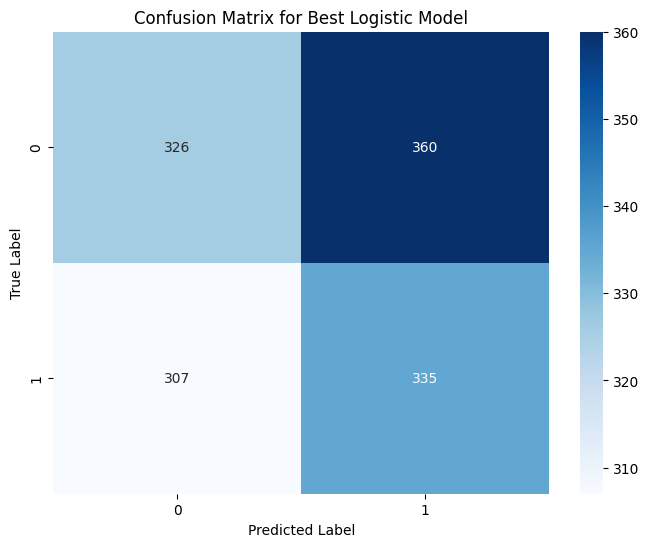

In [ ]:


# Define parameter grid for Logistic Regression
param_grid_logreg = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 5]
}

# Define Logistic Regression model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
model_logreg = make_pipeline(logreg)

# Grid search with cross-validation for Logistic Regression
grid_logreg = GridSearchCV(model_logreg, param_grid_logreg, cv=5, verbose=2)
grid_logreg.fit(X_train, y_train)  # y_train should match the multi-class or binary task
best_logreg_params = grid_logreg.best_params_

# Cross-validation score with best parameters
logreg_cv_score = cross_val_score(grid_logreg.best_estimator_, X_train, y_train, cv=5).mean()

# Print best parameters and cross-validation score
print("Best Logistic Regression Parameters:", best_logreg_params)
print("Logistic Regression Cross-Validation Score:", logreg_cv_score)

# Evaluate on the test set using the best model
best_model = grid_logreg.best_estimator_
y_pred = best_model.predict(X_test)

# Test set performance metrics
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", test_accuracy)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for multi-class
unique_labels = np.unique(y_test)
plot_confusion_matrix(conf_matrix, labels=unique_labels, title='Confusion Matrix for Best Logistic Model')

# Optional: Convert multi-class to binary
binary_map = {0: 0, 1: 0, 2: 1, 3: 1}  # Define your binary mapping
y_test_binary = np.array([binary_map[label] for label in y_test])
y_pred_binary = np.array([binary_map[label] for label in y_pred])




##SVM using Binary

1- liner kernal

In [ ]:
# Linear Kernel
print("Evaluating SVM with Linear Kernel...")
svc_linear = SVC(kernel='linear')

# Define parameter grid
param_dist_linear = {
    'C': [1, 5, 10]
}

# Perform Randomized Search with Cross-Validation
random_search_linear = RandomizedSearchCV(svc_linear, param_dist_linear, n_iter=3, cv=5, scoring='f1_macro', verbose=2, random_state=42)
random_search_linear.fit(X_train, y_train)

# Store results
print("Best Parameters for Linear Kernel:", random_search_linear.best_params_)
print("Best F1 Score for Linear Kernel:", random_search_linear.best_score_)

Evaluating SVM with Linear Kernel...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ................................................C=1; total time=   5.1s
[CV] END ................................................C=1; total time=   6.8s
[CV] END ................................................C=1; total time=   5.7s
[CV] END ................................................C=1; total time=   4.2s
[CV] END ................................................C=1; total time=   4.2s
[CV] END ................................................C=5; total time=  14.2s
[CV] END ................................................C=5; total time=  17.1s
[CV] END ................................................C=5; total time=  14.4s
[CV] END ................................................C=5; total time=  13.6s
[CV] END ................................................C=5; total time=  13.9s
[CV] END ...............................................C=10; total time=  24.3s
[CV] END ...

2-RBF Kernal

In [ ]:
# RBF Kernel
print("\nEvaluating SVM with RBF Kernel...")
svc_rbf = SVC(kernel='rbf')

# Define parameter grid
param_dist_rbf = {
    'C': [1, 5, 10],
    'gamma': [0.0005, 0.001, 0.005]
}

# Perform Randomized Search with Cross-Validation
random_search_rbf = RandomizedSearchCV(svc_rbf, param_dist_rbf, n_iter=5, cv=5, scoring='f1_macro', verbose=2, random_state=42)
random_search_rbf.fit(X_train, y_train)

# Store results
print("Best Parameters for RBF Kernel:", random_search_rbf.best_params_)
print("Best F1 Score for RBF Kernel:", random_search_rbf.best_score_)


Evaluating SVM with RBF Kernel...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..................................C=10, gamma=0.001; total time=   2.0s
[CV] END ..................................C=10, gamma=0.001; total time=   1.3s
[CV] END ..................................C=10, gamma=0.001; total time=   1.1s
[CV] END ..................................C=10, gamma=0.001; total time=   1.1s
[CV] END ..................................C=10, gamma=0.001; total time=   1.2s
[CV] END ...................................C=1, gamma=0.001; total time=   1.1s
[CV] END ...................................C=1, gamma=0.001; total time=   1.1s
[CV] END ...................................C=1, gamma=0.001; total time=   1.1s
[CV] END ...................................C=1, gamma=0.001; total time=   1.1s
[CV] END ...................................C=1, gamma=0.001; total time=   1.1s
[CV] END ...................................C=5, gamma=0.005; total time=   1.8s
[CV] END .....

3-Polynomial kernal

In [ ]:
# Polynomial Kernel
print("\nEvaluating SVM with Polynomial Kernel...")
svc_poly = SVC(kernel='poly')

# Define parameter grid
param_dist_poly = {
    'C': [1, 5, 10],
    'gamma': [0.0005, 0.001, 0.005],
    'degree': [2, 3]
}

# Perform Randomized Search with Cross-Validation
random_search_poly = RandomizedSearchCV(svc_poly, param_dist_poly, n_iter=5, cv=5, scoring='f1_macro', verbose=2, random_state=42)
random_search_poly.fit(X_train, y_train)

# Store results
print("Best Parameters for Polynomial Kernel:", random_search_poly.best_params_)
print("Best F1 Score for Polynomial Kernel:", random_search_poly.best_score_)


Evaluating SVM with Polynomial Kernel...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ........................C=1, degree=2, gamma=0.0005; total time=   0.9s
[CV] END ........................C=1, degree=2, gamma=0.0005; total time=   1.0s
[CV] END ........................C=1, degree=2, gamma=0.0005; total time=   0.9s
[CV] END ........................C=1, degree=2, gamma=0.0005; total time=   0.9s
[CV] END ........................C=1, degree=2, gamma=0.0005; total time=   0.9s
[CV] END .........................C=1, degree=2, gamma=0.001; total time=   1.0s
[CV] END .........................C=1, degree=2, gamma=0.001; total time=   1.1s
[CV] END .........................C=1, degree=2, gamma=0.001; total time=   1.5s
[CV] END .........................C=1, degree=2, gamma=0.001; total time=   1.4s
[CV] END .........................C=1, degree=2, gamma=0.001; total time=   1.6s
[CV] END .........................C=5, degree=2, gamma=0.005; total time=   3.5s
[CV] EN

4-Sigmoid Kernel

In [ ]:
# Sigmoid Kernel
print("\nEvaluating SVM with Sigmoid Kernel...")
svc_sigmoid = SVC(kernel='sigmoid')

# Define parameter grid
param_dist_sigmoid = {
    'C': [1, 5, 10],
    'gamma': [0.0005, 0.001, 0.005]
}

# Perform Randomized Search with Cross-Validation
random_search_sigmoid = RandomizedSearchCV(svc_sigmoid, param_dist_sigmoid, n_iter=5, cv=5, scoring='f1_macro', verbose=2, random_state=42)
random_search_sigmoid.fit(X_train, y_train)

# Store results
print("Best Parameters for Sigmoid Kernel:", random_search_sigmoid.best_params_)
print("Best F1 Score for Sigmoid Kernel:", random_search_sigmoid.best_score_)


Evaluating SVM with Sigmoid Kernel...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..................................C=10, gamma=0.001; total time=   0.9s
[CV] END ..................................C=10, gamma=0.001; total time=   0.9s
[CV] END ..................................C=10, gamma=0.001; total time=   0.9s
[CV] END ..................................C=10, gamma=0.001; total time=   0.9s
[CV] END ..................................C=10, gamma=0.001; total time=   0.9s
[CV] END ...................................C=1, gamma=0.001; total time=   0.9s
[CV] END ...................................C=1, gamma=0.001; total time=   1.3s
[CV] END ...................................C=1, gamma=0.001; total time=   1.4s
[CV] END ...................................C=1, gamma=0.001; total time=   1.3s
[CV] END ...................................C=1, gamma=0.001; total time=   1.3s
[CV] END ...................................C=5, gamma=0.005; total time=   1.4s
[CV] END .

### Use the best parameters for predicitons and evaluate the performance.

Evaluating SVM with RBF Kernel...
SVM model has been trained and saved as 'svm_model.pkl'
Accuracy of the best model: 0.4902
F1 Macro of the best model: 0.4883
Confusion Matrix:
[[366 320]
 [357 285]]


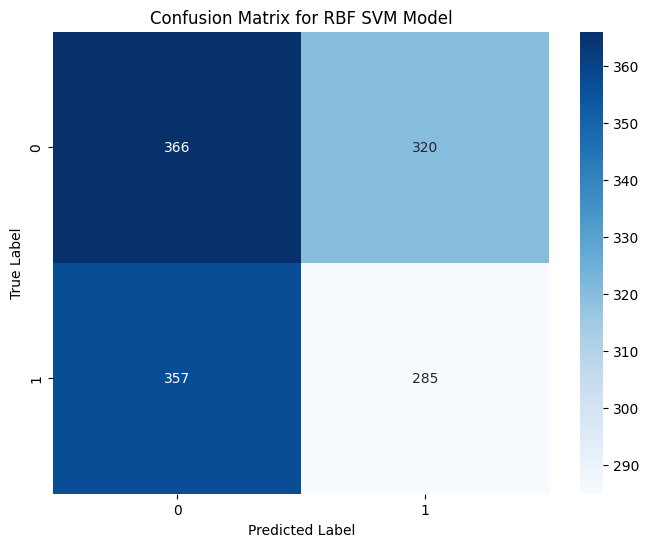

              precision    recall  f1-score   support

           0       0.51      0.53      0.52       686
           1       0.47      0.44      0.46       642

    accuracy                           0.49      1328
   macro avg       0.49      0.49      0.49      1328
weighted avg       0.49      0.49      0.49      1328



In [ ]:
# RBF Kernel SVM Model
print("Evaluating SVM with RBF Kernel...")

# Best parameters obtained from RandomizedSearchCV
best_params = {
    'C': 1,
    'gamma': 0.0005
}

# Create the final SVM model using the RBF kernel and best hyperparameters
final_svc = SVC(kernel='rbf', **best_params)

# Fit the model on the training data
final_svc.fit(X_train, y_train)

# Save the trained model for future use
joblib.dump(final_svc, 'svm_model.pkl')
print("SVM model has been trained and saved as 'svm_model.pkl'")

# Evaluate on the test set
y_pred = final_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy of the best model: {accuracy:.4f}")
print(f"F1 Macro of the best model: {f1_macro:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, title='Confusion Matrix for RBF SVM Model')

# Print classification report
print(classification_report(y_test, y_pred))
# # RBF Kernel SVM Model
# print("Evaluating SVM with RBF Kernel...")

# # Best parameters obtained from RandomizedSearchCV
# best_params = {
#     'C': 1,
#     'gamma': 0.0005
# }

# # Create the final SVM model using the RBF kernel and best hyperparameters
# final_svc = SVC(kernel='rbf', **best_params)

# # Fit the model on the training data
# final_svc.fit(X_train, y_train)

# # Evaluate on the test set
# y_pred = final_svc.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# f1_macro = f1_score(y_test, y_pred, average='macro')
# conf_matrix = confusion_matrix(y_test, y_pred)

# print(f"Accuracy of the best model: {accuracy:.4f}")
# print(f"F1 Macro of the best model: {f1_macro:.4f}")
# print("Confusion Matrix:")
# print(conf_matrix)

# # Function to plot the confusion matrix
# def plot_confusion_matrix(cm, title='Confusion Matrix'):
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                 xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
#     plt.title(title)
#     plt.xlabel('Predicted Label')
#     plt.ylabel('True Label')
#     plt.show()

# # Plot the confusion matrix
# plot_confusion_matrix(conf_matrix, title='Confusion Matrix for RBF SVM Model')

# # Print classification report
# print(classification_report(y_test, y_pred))


## **Neural Network Using Binary Classification**

In [ ]:
# Define the preprocessing pipeline
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ]
)

# Apply preprocessing to both training and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
X_train_preprocessed = X_train_preprocessed.toarray() if hasattr(X_train_preprocessed, 'toarray') else X_train_preprocessed
X_test_preprocessed = X_test_preprocessed.toarray() if hasattr(X_test_preprocessed, 'toarray') else X_test_preprocessed

# Plotting function for metrics
def plot_curve(epochs, hist, list_of_metrics):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)
    plt.legend()
    plt.show()

# Define the model architecture
def create_model(my_learning_rate):
    model = tf.keras.models.Sequential()
    model.add(layers.Dense(units=96, activation='relu', input_shape=(X_train_preprocessed.shape[1],)))
    model.add(layers.Dropout(rate=0.3))
    model.add(layers.Dense(units=96, activation='relu'))  # Second hidden layer
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(units=32, activation='relu'))  # Third hidden layer
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(units=2, activation='softmax'))  # Output layer for 2 classes
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])
    return model

# Training function
def train_model(model, train_features, train_label, epochs, batch_size=None, validation_split=0.1):
    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                        epochs=epochs, shuffle=True,
                        validation_split=validation_split)
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    return epochs, hist

# Hyperparameters based on tuning
learning_rate = 0.0001
epochs = 124
batch_size = 32
validation_split = 0.2


# Build and train the model
my_model = create_model(learning_rate)
epochs, hist = train_model(my_model, X_train_preprocessed, y_train, epochs, batch_size, validation_split)

# Plot the training metrics
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate on the test set
print("\nEvaluate the model on the test set:")
my_model.evaluate(x=X_test_preprocessed, y=y_test, batch_size=batch_size)


# Predict the classes for the test set
y_pred = my_model.predict(X_test_preprocessed)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Calculate and display the classification report, which includes F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, digits=4))


# Calculate the overall F1-score (macro-average, weighted, etc., based on your preference)
f1 = f1_score(y_test, y_pred_classes, average='weighted')  # Use 'macro' or 'micro' if needed
print(f"Overall F1-score (weighted): {f1:.4f}")

there are huge progress after transforming the data to binary classification accuracy increase from around 25% to around 49% and F1 score from 25% to 48% that lead to better performance in classification.

In [ ]:
# Predict the classes for the test set
y_pred = my_model.predict(X_test_preprocessed)
y_pred_classes = y_pred.argmax(axis=1)

# Ensure y_test is an integer array with discrete labels
y_test = y_test.astype(int)

# Print unique values for verification
print("y_test unique values:", np.unique(y_test))
print("y_pred_classes unique values:", np.unique(y_pred_classes))

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, digits=4))

# Calculate the overall F1-score (weighted)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f"Overall F1-score (weighted): {f1:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, title='Confusion Matrix for NN Model')


## **Ensemble Using Binary Classification**


1-BaggingClassifier using Logistic Regressionas meta model

In [ ]:
# --- Base Models ---

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Logistic Regression Classifier as the meta-model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)

# --- Fit base models on training data ---
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# --- Make predictions with base models ---
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

# --- Evaluate the base models ---
print("Decision Tree Accuracy: {:.2f}".format(accuracy_score(y_test, dt_pred)))
print("Random Forest Accuracy: {:.2f}".format(accuracy_score(y_test, rf_pred)))
print("Gradient Boosting Accuracy: {:.2f}".format(accuracy_score(y_test, gb_pred)))

# --- Bagging Classifier ---
# Create a BaggingClassifier using Decision Tree as base model
bagging_model = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)

# Fit the bagging model on the training data
bagging_model.fit(X_train, y_train)

# Make predictions using the bagging model
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the Bagging Classifier
print("Bagging Classifier Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_bagging)))

# --- Stacking Classifier ---
# Use the existing logistic regression model as the meta-model
stacking_clf = StackingClassifier(classifiers=[dt, rf, gb], meta_classifier=logreg)

# Fit the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Make predictions using the Stacking Classifier
stacked_pred = stacking_clf.predict(X_test)

# Evaluate the Stacking Classifier
print("Stacking Classifier Accuracy: {:.2f}".format(accuracy_score(y_test, stacked_pred)))
(y_test, stacked_pred)



Decision Tree Accuracy: 0.50
Random Forest Accuracy: 0.50
Gradient Boosting Accuracy: 0.52
Bagging Classifier Accuracy: 0.50
Stacking Classifier Accuracy: 0.50


(1509    0
 4503    1
 4600    0
 1544    1
 4668    0
        ..
 555     0
 2759    1
 3413    0
 1703    1
 4714    1
 Name: Mental_Health_Status, Length: 1328, dtype: int64,
 array([0, 0, 0, ..., 1, 0, 0]))

2-BaggingClassifier using Svm meta model

In [ ]:
# --- Base Models ---

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# SVM Classifier as the meta-model with RBF kernel
final_svc = SVC(kernel='rbf', probability=True)  # Set probability=True if needed

# --- Fit base models on training data ---
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# --- Make predictions with base models ---
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

# --- Evaluate the base models ---
print("Decision Tree Accuracy: {:.2f}".format(accuracy_score(y_test, dt_pred)))
print("Random Forest Accuracy: {:.2f}".format(accuracy_score(y_test, rf_pred)))
print("Gradient Boosting Accuracy: {:.2f}".format(accuracy_score(y_test, gb_pred)))

# --- Bagging Classifier ---
# Create a BaggingClassifier using Decision Tree as base model
bagging_model = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)

# Fit the bagging model on the training data
bagging_model.fit(X_train, y_train)

# Make predictions using the bagging model
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the Bagging Classifier
print("Bagging Classifier Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_bagging)))

# --- Stacking Classifier ---
# Create StackingClassifier using base models and the SVM meta model
stacking_clf = StackingClassifier(classifiers=[dt, rf, gb], meta_classifier=final_svc)

# Fit the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Make predictions using the Stacking Classifier
stacked_pred = stacking_clf.predict(X_test)

# Evaluate the Stacking Classifier
print("Stacking Classifier Accuracy: {:.2f}".format(accuracy_score(y_test, stacked_pred)))




Decision Tree Accuracy: 0.50
Random Forest Accuracy: 0.50
Gradient Boosting Accuracy: 0.52
Bagging Classifier Accuracy: 0.50
Stacking Classifier Accuracy: 0.49


3-Voting Classifier

In [ ]:
# Re-initialize final_svc with probability=True
final_svc = SVC(C=1, degree=4, gamma=0.005, probability=True, kernel='rbf')  # Set kernel here

# Create a VotingClassifier with the provided models
voting_clf = VotingClassifier(estimators=[('logreg', logreg), ('svc', final_svc                    )], voting='soft')

# Fit the VotingClassifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the Voting Classifier
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Classification Report for Voting Classifier:")
print(classification_report(y_test, y_pred_voting))



Voting Classifier Accuracy: 0.509789156626506
Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       0.52      0.57      0.55       686
           1       0.49      0.45      0.47       642

    accuracy                           0.51      1328
   macro avg       0.51      0.51      0.51      1328
weighted avg       0.51      0.51      0.51      1328



#Random Classifier(DummyClassifier) with binary classification

In [ ]:
# Initialize the DummyClassifier with 'most_frequent' strategy
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)

# Train the classifier
dummy_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = dummy_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

#ROC Curve for binary classification

The following is the ROC Curves for the models(Logistig Regression, SVM, Bagging Classifier, Neural Network)

In [ ]:
y_test_binarized = np.column_stack([1 - y_test, y_test])  # Binary: Class 0 and Class 1

# Dictionary of models including the neural network
chosen_models = {
    'SVM': final_svc,                           # SVM model
    'Logistic Regression': best_model,          # Logistic regression model
    'Bagging Classifier': bagging_model,        # Bagging classifier
    'Neural Network': my_model                  # Neural network model
}

# Generate a separate ROC curve plot for each model, showing all classes on the same plot
for model_name, model in chosen_models.items():
    plt.figure(figsize=(8, 6))
    print(f"Processing model: {model_name}")

    # Fit non-NN models (ensure SVM has probability=True if required)
    if model_name != 'Neural Network':
        model.fit(X_train, y_train)

    # Get probability predictions for the test set
    if hasattr(model, 'predict_proba'):
        y_val_prob = model.predict_proba(X_test)  # For models supporting `predict_proba`
    elif hasattr(model, 'decision_function'):  # For models like SVM without predict_proba
        y_val_prob = model.decision_function(X_test)
        # Convert decision_function output to probabilities for binary classification
        if len(np.unique(y_test)) == 2:  # Binary classification
            from sklearn.utils.extmath import softmax
            y_val_prob = softmax(np.column_stack([-y_val_prob, y_val_prob]), axis=1)
    elif model_name == 'Neural Network':  # Special handling for the neural network
        y_val_prob = model.predict(X_test)
    else:
        raise ValueError(f"{model_name} does not provide probabilities or decision scores.")

    # Ensure neural network predictions are probabilities
    if model_name == 'Neural Network' and y_val_prob.shape[1] != len(set(y_test)):
        raise ValueError("Neural Network model does not output probabilities correctly. Check its final activation layer.")

    # Plot ROC curve for each class
    for i in range(y_test_binarized.shape[1]):  # Loop over each class
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_val_prob[:, i])
        auc_score = roc_auc_score(y_test_binarized[:, i], y_val_prob[:, i])

        # Plot each class with a unique label for AUC
        plt.plot(fpr, tpr, label=f"Class {i} AUC = {auc_score:.3f}")

    # Plot settings
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name} (All Classes)')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


##Steps for Preparing the Live Demo

In [ ]:
# import joblib
# from tensorflow.keras.models import save_model

# Save Logistic Regression model
joblib.dump(grid_logreg.best_estimator_, 'logistic_model.pkl')

# Save Voting Classifier
joblib.dump(voting_clf, 'voting_classifier.pkl')

# Save the best SVM model
joblib.dump(final_svc, 'svm_model.pkl')

['svm_model.pkl']


Predictions for New Examples:
Example 1:
   True Label: 1
   Logistic Regression Prediction: 0
   SVM Prediction: 0
   Voting Classifier Prediction: 1

Example 2:
   True Label: 0
   Logistic Regression Prediction: 1
   SVM Prediction: 0
   Voting Classifier Prediction: 0

Example 3:
   True Label: 1
   Logistic Regression Prediction: 1
   SVM Prediction: 0
   Voting Classifier Prediction: 1

Example 4:
   True Label: 1
   Logistic Regression Prediction: 0
   SVM Prediction: 0
   Voting Classifier Prediction: 0

Example 5:
   True Label: 0
   Logistic Regression Prediction: 1
   SVM Prediction: 1
   Voting Classifier Prediction: 1

Logistic Regression Results:
Confusion Matrix:
 [[0 2]
 [2 1]]


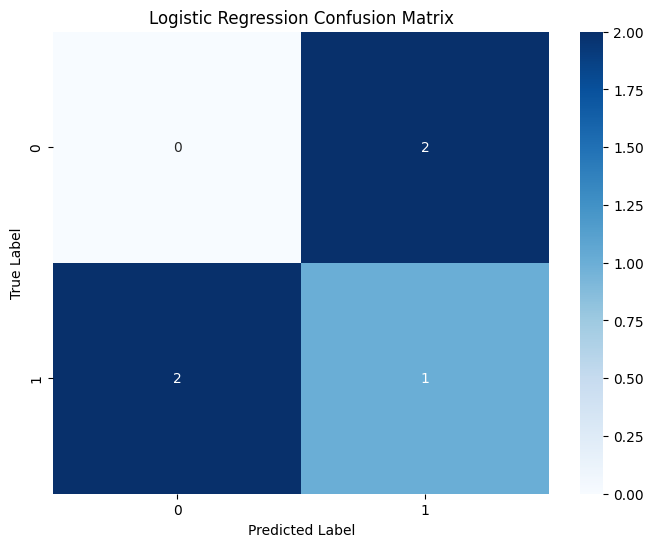

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.33      0.33         3

    accuracy                           0.20         5
   macro avg       0.17      0.17      0.17         5
weighted avg       0.20      0.20      0.20         5

SVM Results:
Confusion Matrix:
 [[1 1]
 [3 0]]


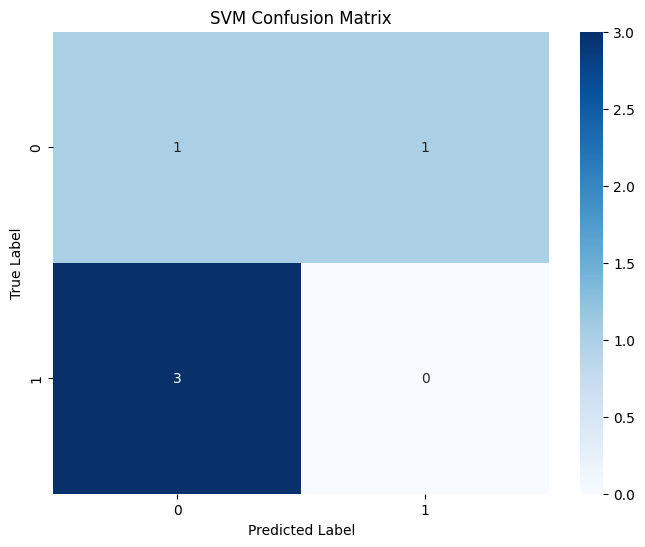

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.00      0.00      0.00         3

    accuracy                           0.20         5
   macro avg       0.12      0.25      0.17         5
weighted avg       0.10      0.20      0.13         5

Voting Classifier Results:
Confusion Matrix:
 [[1 1]
 [1 2]]


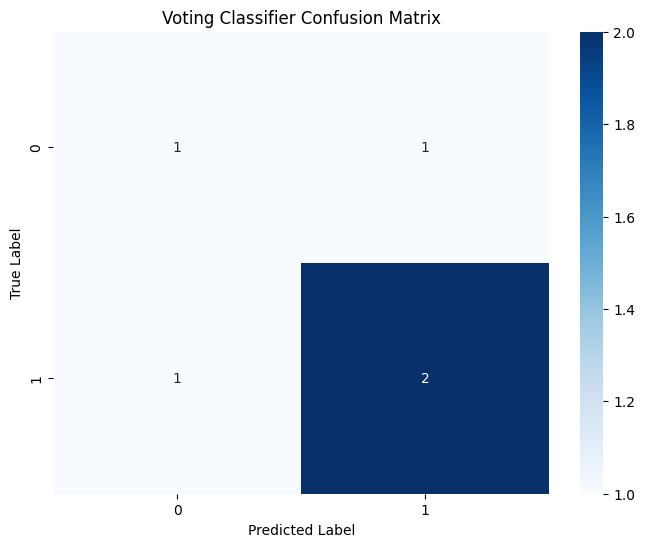

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [ ]:
# import pandas as pd
# import joblib
# import numpy as np
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# New examples (provided data)
new_examples = pd.DataFrame({
    'Age': [28, 22, 35, 45, 29],
    'Gender': [1, 0, 1, 0, 1],
    'Technology_Usage_Hours': [5.4, 4.1, 6.2, 8.0, 3.7],
    'Social_Media_Usage_Hours': [3.5, 2.7, 4.9, 5.1, 2.4],
    'Gaming_Hours': [2.1, 1.5, 1.9, 3.3, 1.7],
    'Screen_Time_Hours': [9.8, 8.4, 7.5, 11.4, 6.0],
    'Stress_Level': [5, 4, 6, 7, 3],
    'Sleep_Hours': [7.2, 8.5, 6.8, 6.5, 8.1],
    'Physical_Activity_Hours': [5.3, 3.9, 4.7, 6.2, 5.1],
    'Support_Systems_Access': [0, 1, 0, 1, 0],
    'Work_Environment_Impact': [0, 2, 0, 0, 2],
    'Online_Support_Usage': [1, 0, 0, 1, 1]
})

# True labels for the new examples
true_labels = [1, 0, 1, 1, 0]

# --- Load Saved Models ---
logistic_model = joblib.load('logistic_model.pkl')
svm_model = joblib.load('svm_model.pkl')
voting_classifier = joblib.load('voting_classifier.pkl')

# --- Predictions ---
logistic_preds = logistic_model.predict(new_examples)
svm_preds = svm_model.predict(new_examples)
voting_preds = voting_classifier.predict(new_examples)

# --- Display Results ---
print("\nPredictions for New Examples:")
for i, (true_label, logistic_pred, svm_pred, voting_pred) in enumerate(zip(true_labels, logistic_preds, svm_preds, voting_preds)):
    print(f"Example {i + 1}:")
    print(f"   True Label: {true_label}")
    print(f"   Logistic Regression Prediction: {logistic_pred}")
    print(f"   SVM Prediction: {svm_pred}")
    print(f"   Voting Classifier Prediction: {voting_pred}")
    print()

# --- Evaluate Each Model ---
# Logistic Regression Evaluation
print("Logistic Regression Results:")
logistic_cm = confusion_matrix(true_labels, logistic_preds)
print("Confusion Matrix:\n", logistic_cm)
plot_confusion_matrix(logistic_cm, labels=np.unique(true_labels), title='Logistic Regression Confusion Matrix')
print("Classification Report:\n", classification_report(true_labels, logistic_preds))

# SVM Evaluation
print("SVM Results:")
svm_cm = confusion_matrix(true_labels, svm_preds)
print("Confusion Matrix:\n", svm_cm)
plot_confusion_matrix(svm_cm, labels=np.unique(true_labels), title='SVM Confusion Matrix')
print("Classification Report:\n", classification_report(true_labels, svm_preds))

# Voting Classifier Evaluation
print("Voting Classifier Results:")
voting_cm = confusion_matrix(true_labels, voting_preds)
print("Confusion Matrix:\n", voting_cm)
plot_confusion_matrix(voting_cm, labels=np.unique(true_labels), title='Voting Classifier Confusion Matrix')
print("Classification Report:\n", classification_report(true_labels, voting_preds))

